In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
from scipy.optimize import curve_fit
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [19]:
inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/'
cat_path = inpath + 'amico_cosmoDC2/mag_i/'
matching = 'p'

In [22]:
c_merged_12

id,cat1_id,cat1_ra,cat1_dec,cat1_z,cat1_mass,cat1_mt_self,cat1_mt_other,cat1_mt_multi_self,cat1_mt_multi_other,cat1_mt_cross,cat2_id,cat2_ra,cat2_dec,cat2_z,cat2_mass,cat2_log_mass,cat2_m200c,cat2_log_m200c,cat2_mt_self,cat2_mt_other,cat2_mt_multi_self,cat2_mt_multi_other,cat2_mt_cross,mt_self,mt_other,mt_multi_self,mt_multi_other
str6,bytes11,float64,float64,float32,float64,bytes13,bytes13,bytes175,bytes175,bytes13,bytes21,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes6,bytes45,bytes45,bytes6,object,object,object,object
0,1,50.113525,-40.03647,0.44,75.694496,649700151338,649700151338,"649700151338,125900151315","649700151338,125900151315",649700151338,649700151338,50.11509823129538,-40.03536446556387,0.4336901903152466,2.914e+14,14.46455263904217,307207389507064.8,14.487431657920492,1,1,1,1,1,None,None,[],[]
1,2,50.642569,-41.402661,0.2,62.659902,130200151411,130200151411,"130200151411,227500151382,220600151392","130200151411,227500151382,220600151392",130200151411,130200151411,50.642098246561304,-41.40092456771352,0.19159162044525146,2.639e+14,14.421495474089287,229655937300912.7,14.361077677725604,2,2,"2,85","2,85",2,None,None,[],[]
2,3,50.421896,-39.587457,0.39,48.460455,388500151355,388500151355,"359100151331,388500151355,391900151338,690600151338,683800151355,370000151373","359100151331,388500151355,690600151338,391900151338,683800151355,370000151373",388500151355,388500151355,50.42203362588924,-39.587746579168694,0.3911494016647339,1.547e+14,14.189385464227009,145162982864405.66,14.161855883669066,3,3,"532,3,248","532,3,248",3,None,None,[],[]
3,4,50.603551,-39.582656,1.1,118.29114,190400151235,190400151235,"2401800151213,852600151247,190400151235,486200151247,703100151230,3279900151235","2401800151213,852600151247,190400151235,703100151230,486200151247,3279900151235",190400151235,190400151235,50.601945314584675,-39.584667514262556,1.0864953994750977,2.013e+14,14.30378567158675,180916919696946.5,14.257479184811185,4,4,4,4,4,None,None,[],[]
4,5,50.577077,-40.162645,0.59,72.90131,1038800151307,1038800151307,"1038800151307,306600151331,954400151315","1038800151307,954400151315,306600151331",1038800151307,1038800151307,50.57622204392435,-40.161587068873025,0.5822875499725342,1.808e+14,14.257238495016074,166094272990828.2,14.220354658030198,5,5,"1001,5","1001,5",5,None,None,[],[]
5,6,51.048368,-41.281951,0.79,79.642977,703400151279,703400151279,"703400151279,1903300151279,537900164279","537900164279,1903300151279,703400151279",703400151279,703400151279,51.04701591813105,-41.28182572206524,0.7761750221252441,1.387e+14,14.141947581783008,120095931769870.42,14.079528295997234,6,6,6,6,6,None,None,[],[]
6,7,50.085692,-40.246344,0.33,32.591521,397900151373,397900151373,"397900151373,849400151338","397900151373,849400151338",397900151373,397900151373,50.088972114838356,-40.241736968305695,0.3244130611419678,1.981e+14,14.29683174167632,137755570256766.2,14.139109168923937,7,7,7,7,7,None,None,[],[]
7,8,50.590563,-39.602651,0.39,37.742523,481800151355,481800151355,"279900151392,481800151355,102300151382,1404200151323","279900151392,481800151355,102300151382,1404200151323",481800151355,481800151355,50.59082024698755,-39.600774798586926,0.388502836227417,2.252e+14,14.352617559518354,170961414242073.25,14.232898101779949,8,8,8,8,8,None,None,[],[]
8,9,51.576131,-40.01887,0.61,55.388537,689000151307,689000151307,"689000151307,1388400151307,786300151331","689000151307,1388400151307,786300151331",689000151307,689000151307,51.57638580775331,-40.02086515625286,0.5962231159210205,1.465e+14,14.165886508001352,129057186322749.3,14.110782192478652,9,9,9,9,9,None,None,[],[]


In [24]:
c1 = ClCatalog.read(cat_path + 'c1_' + matching + '.fits', 'c1', full = True)
c2 = ClCatalog.read(cat_path + 'c2_' + matching + '.fits', 'c2', full = True)

completeness vs mass in z bins


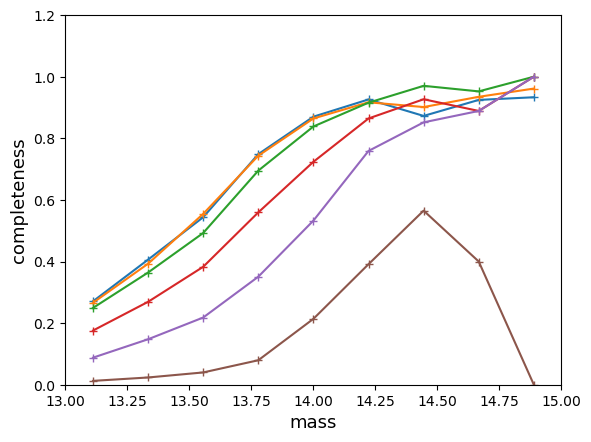

In [25]:
c_merged_12 = ClCatalog.read(cat_path+'output_catalog_' + matching + '.fits', 'merged',  full=True)


#plot style
figx=10
figy=7


print('completeness vs mass in z bins') 
param1, param2, param3, param4 = 'cat2_log_mass', 'log_mass', 'cat2_z', 'z'
nbins_x = 10
bin1 = np.linspace(13, 15, nbins_x)
bin2 = [.2,.5,.8,1,1.2,1.5,1.8] #For AMICO
labels=['0.2-0.5','0.5-0.8','0.8-1.0','1.0-1.2','1.2-1.5','1.5-1.8']
plt.xlim(13,15)

nbins_x -= 1
bin_range = [min(bin1), max(bin1)]
compl = np.empty([len(bin2),nbins_x])
bin_x = np.empty([nbins_x])
for ix in range(nbins_x):
    bin_x[ix] = 0.5 * (bin1[ix] + bin1[ix+1])
for i in range(0,len(bin2)-1):
    cut1 = bin2[i]
    cut2 = bin2[i+1]
    filter1 = np.logical_and(c_merged_12.data[param3] > cut1, c_merged_12.data[param3] < cut2)
    filter2 = np.logical_and(c2.data[param4] > cut1, c2.data[param4] < cut2)
    c_halos_matched = c_merged_12[filter1]
    c_halos = c2.data[filter2]
    h_r_halos_matched = np.histogram(c_halos_matched[param1], bins=nbins_x, range=bin_range, normed=None, weights=None, density=None)
    h_r_halos  = np.histogram(c_halos[param2], bins=nbins_x, range=bin_range, normed=None, weights=None, density=None)
    compl[i] = np.divide(h_r_halos_matched[0], h_r_halos[0], where=(h_r_halos[0]!=0))
    plt.ylim(0, 1.2)
    plt.xlabel('mass', fontsize = 13)
    plt.ylabel('completeness', fontsize = 13)
    plt.plot(bin_x, compl[i], marker = '+', label = labels[i])


In [30]:
from numpy.ma import masked

In [35]:
h_r_halos[0]

array([35585, 15316,  5895,  2014,   547,   115,    23,     0,     0])

In [36]:
for i in range(len(h_r_halos[0])):
    if h_r_halos[0][i] <=10:
        h_r_halos[0][i]=int(np.nan)

ValueError: cannot convert float NaN to integer

In [33]:
h_r_halos

(array([35585, 15316,  5895,  2014,   547,   115,    23,     0,     0]),
 array([13.        , 13.22222222, 13.44444444, 13.66666667, 13.88888889,
        14.11111111, 14.33333333, 14.55555556, 14.77777778, 15.        ]))

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_amico/"
inpathi = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/amico_map_associations_flxzb_mag/mag_i/"
inpathy = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/amico_map_associations_flxzb_mag/mag_y/"

In [3]:
am_i = inpathi + 'Catalog.fits'
am_y = inpathy + 'Catalog.fits'

In [4]:
ami = Table.read(am_i)
amy = Table.read(am_y)

In [5]:
bins = np.linspace(0,50,50)

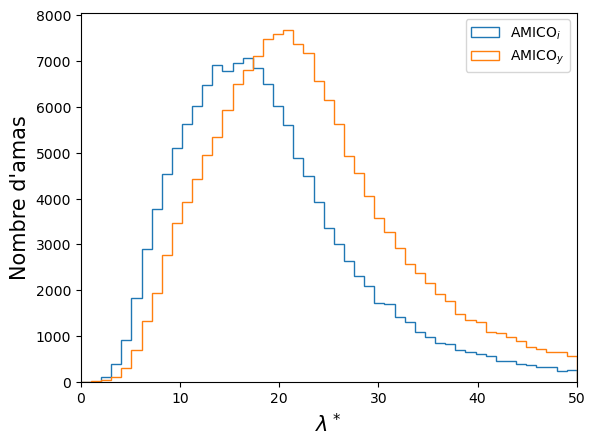

In [11]:
plt.hist(ami['mass'], bins = bins, label = 'AMICO$_i$', histtype = 'step')
plt.hist(amy['mass'], bins = bins, label = 'AMICO$_y$', histtype = 'step')
plt.xlim([0,50])
plt.xlabel('$\lambda^*$', fontsize = 15)
plt.ylabel("Nombre d'amas", fontsize = 15)
plt.legend()
plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/rich_i-rich_y.png', format='png')
plt.show()

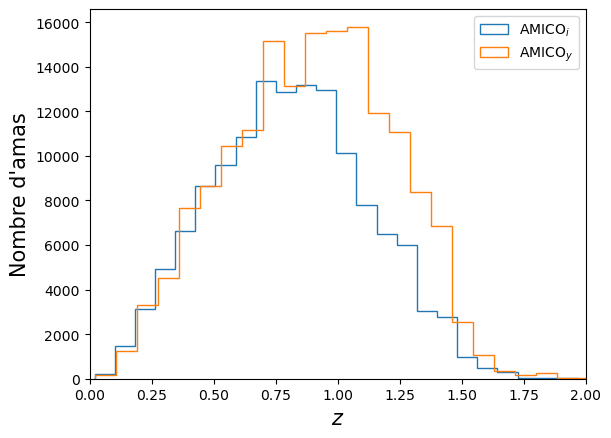

In [16]:
plt.hist(ami['z'], bins = 25, label = 'AMICO$_i$', histtype = 'step')
plt.hist(amy['z'], bins = 25, label = 'AMICO$_y$', histtype = 'step')
plt.xlim([0,2])
plt.xlabel('$z$', fontsize = 15)
plt.ylabel("Nombre d'amas", fontsize = 15)
plt.legend()
plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/z_i-z_y.png', format='png')
plt.show()

In [8]:
len(ami), len(amy)

(135916, 165149)

In [8]:
#print(cat.list_all_quantities())

/sps/lsst/users/namourou/conda_clone_210223/descv1.1/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/sps/lsst/users/namourou/conda_clone_210223/descv1.1/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


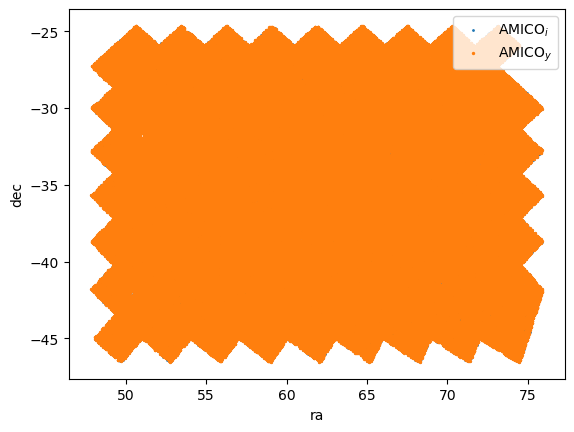

In [12]:
plt.scatter(ami['ra'], ami['dec'], s = 1, label = 'AMICO$_i$')
plt.scatter(amy['ra'], amy['dec'], s = 2, label = 'AMICO$_y$')
plt.xlabel('ra')
plt.ylabel('dec')
plt.legend()

In [10]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_amico/'

In [11]:
c1 = ClCatalog.read(path+'c1_p.fits', 'c1', full = True)
c2 = ClCatalog.read(path+'c2_p.fits', 'c2', full = True)

In [12]:
matching_folder = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_amico/'

In [13]:
#output_matched_catalog(matching_folder+'c1_p.fits', matching_folder+'c2_p.fits',matching_folder+'output_catalog_' + 'p' +'.fits', c1, c2, matching_type='cross', overwrite=True)
c_merged_12 = ClCatalog.read(matching_folder+'output_catalog_' + 'p' + '.fits', 'merged',  full=True)

/sps/lsst/users/namourou/conda_clone_210223/descv1.1/clevar/clevar/catalog.py:280: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [17]:
def f(x,a,b):
    return a*x+b

In [18]:
par, cov = curve_fit(f, c_merged_12['cat1_mass'], c_merged_12['cat2_mass'])

In [19]:
par

array([1.21150489, 1.01824842])

In [20]:
cov

array([[ 1.13156296e-06, -2.39032918e-05],
       [-2.39032918e-05,  6.83399262e-04]])

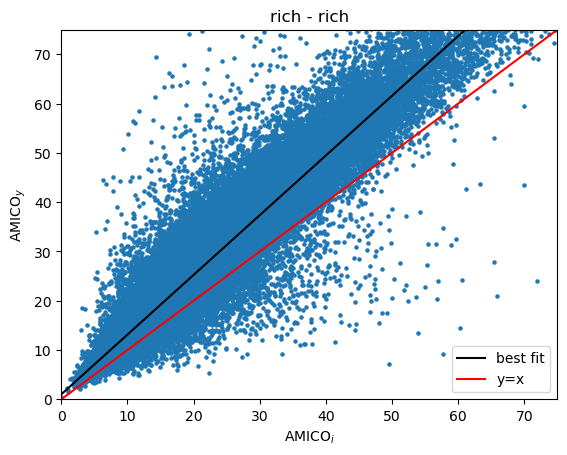

In [23]:
#faire un fit
plt.scatter(c_merged_12['cat1_mass'], c_merged_12['cat2_mass'], s=5)
plt.plot(np.linspace(0,90), f(np.linspace(0,90),par[0],par[1]), color = 'black', label = 'best fit')
plt.plot(np.linspace(0,90), f(np.linspace(0,90),1,0), color = 'red', label = 'y=x')
plt.xlim([0,75])
plt.ylim([0,75])
plt.title('rich - rich')
plt.xlabel('AMICO$_i$')
plt.ylabel('AMICO$_y$')
plt.legend()

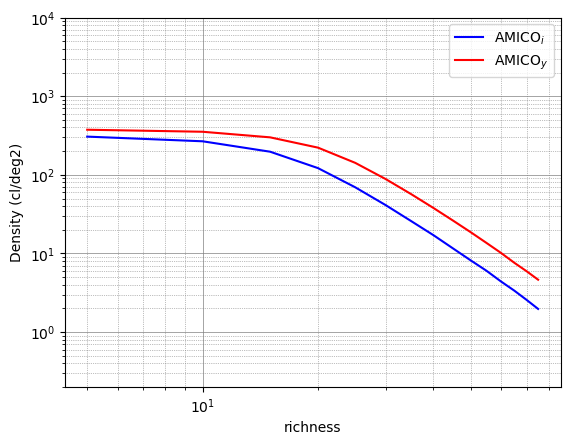

In [14]:
sky_area_sq_deg = 439.78986
rich_bins = np.linspace(5, 75, 15)
#rich_binsb = np.linspace(0, 75, 15)
cdf1 = np.searchsorted(c1["mass"], rich_bins, sorter=c1["mass"].argsort())
cdf1 = len(c1)-cdf1
#cdf1b = np.searchsorted(c1["mass"], rich_bins*par[0]+par[1], sorter=c1["mass"].argsort())
#cdf1b = len(c1)-cdf1b
cdf2 = np.searchsorted(c2["mass"], rich_bins, sorter=c2["mass"].argsort())
cdf2 = len(c2)-cdf2
g1, = plt.semilogy(rich_bins, cdf1 / sky_area_sq_deg, color = 'blue', label = 'AMICO$_i$')
#g1b, = plt.semilogy(rich_bins*par[0]+par[1], cdf1b / sky_area_sq_deg, color = 'blue', label = 'amico_rescaled', linestyle = '--')
g2, = plt.semilogy(rich_bins, cdf2 / sky_area_sq_deg, color = 'red', label = 'AMICO$_y$')
plt.xlabel("richness");
plt.ylabel("Density (cl/deg2)");
plt.legend()
plt.xscale('log')
plt.ylim([0.2,10000])
plt.grid(which='major', axis='both', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', axis='both', linestyle=':', linewidth='0.5', color='grey')

Text(0, 0.5, '$Density_{AMy}/Density_{AMi}$')

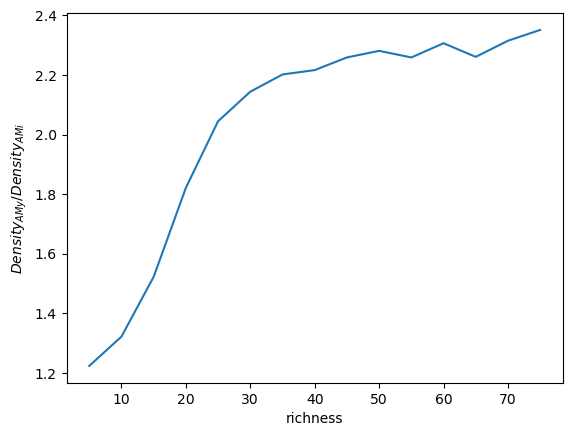

In [26]:
plt.plot(rich_bins, cdf2/cdf1)
plt.xlabel('richness')
plt.ylabel('$Density_{AMy}/Density_{AMi}$')